<a href="https://colab.research.google.com/github/7997275647/Machine_Learning/blob/main/Copy_of_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning.

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

##Dataset.
link to dataset: https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

The data set was generated by a Monte Carlo program, Corsika, described in:
    D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers,
    Forschungszentrum Karlsruhe FZKA 6019 (1998).
http://rexa.info/paper?id=ac6e674e9af20979b23d3ed4521f1570765e8d68


In [42]:
cols = ["fLength","fWidth","fSize","fConc","fConcl", "fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv("magic04.data",names = cols)
df.head()

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [43]:
df["class"]= (df["class"] == 'g').astype(int)
df.head()

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


##Supervised Learning
### 1.Classification:
Predicts discrete classes.
###1.1 Binary Classification:
> Possitive/Negative

> Cat/Dog

> Spam/Not Spam

###1.2 Multiclass Classification:
> Apple/Orange/Banana

> Cat/Dog/Lizard/Dolphin

> Plant species

### 2.Regression:
Predicts continuous values.
> Price of a House.

> Weather.

##Model
###DataSet:
Each Row: Sample.

Each column: Feature.

Each Row Except Output Column: Feature Vector.

Output Column: Label (Y).

Everything Except Output Column: Features Matrix (X).

Data set can be devided into 3 parts:
>Training Dataset(usually 60%): used to train the model.

>Validation Dataset(20%): used as a reality check during/after trainig to ensure model can handle unseen data.

>Testing Dataset(20%): used as to check how generalizable the final chosen model is.


Loss function:
> L1 Loss = sum(|Yreal - Ypredicted|)

> L2 Loss = sum((Yreal - Ypredicted)^2)

> Binary Cross-Entropy Loss = 1/N*sum(Yreal*log(Ypredicted)+(1-Yreal)*log(1-Ypredicted))



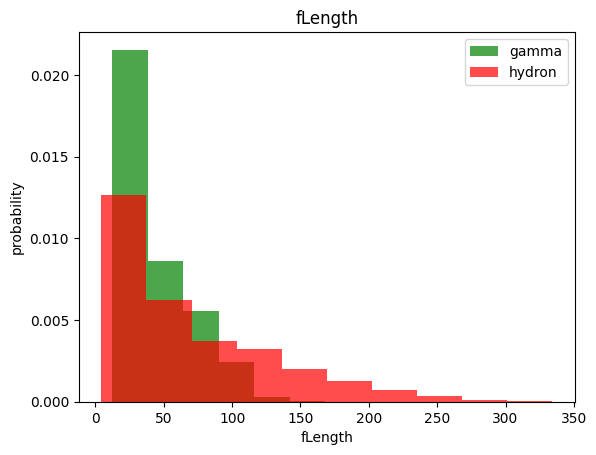

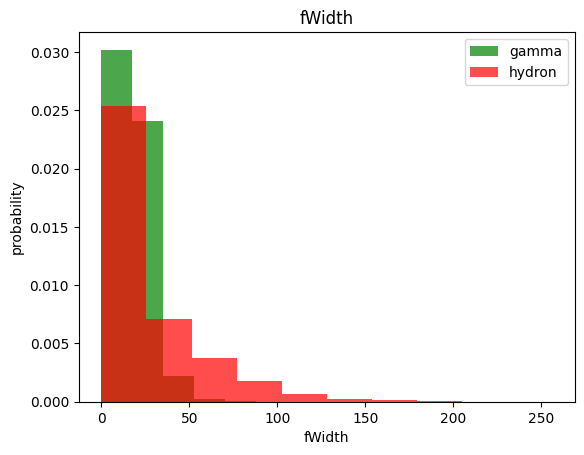

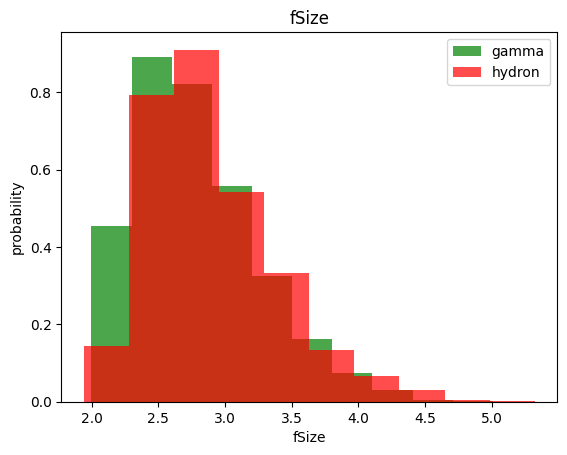

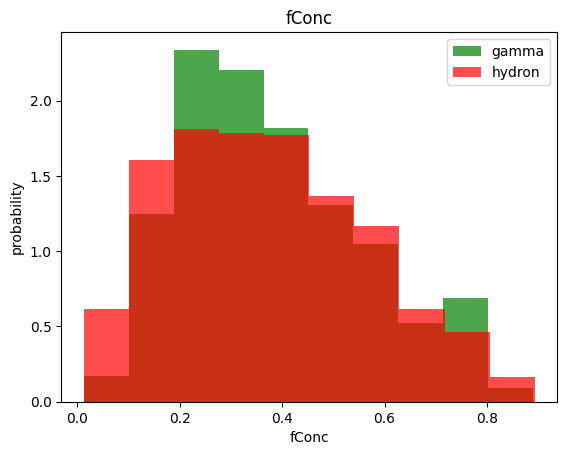

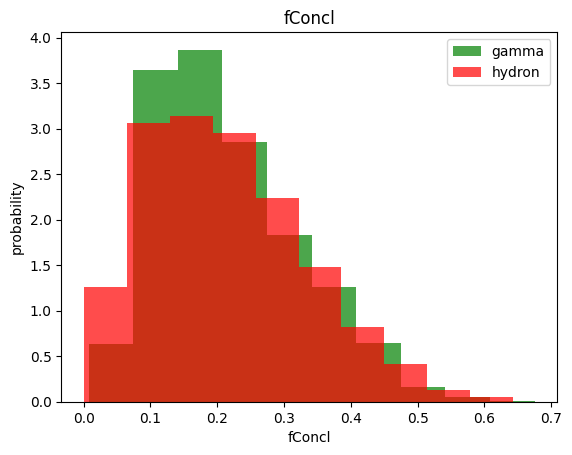

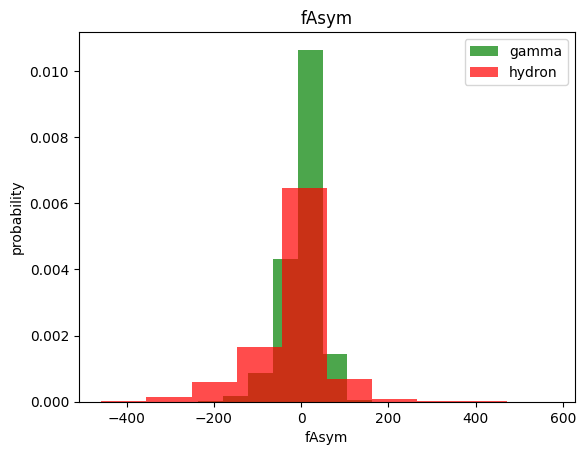

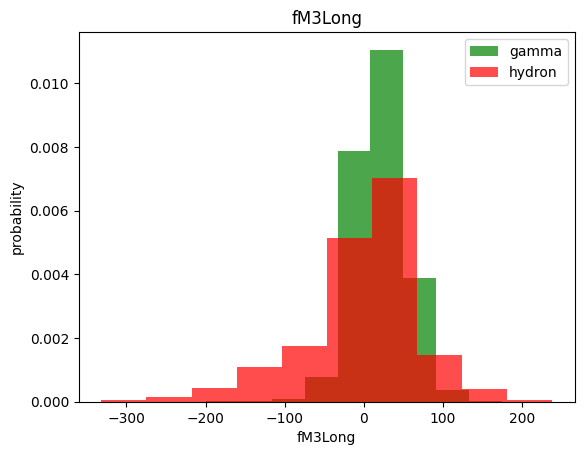

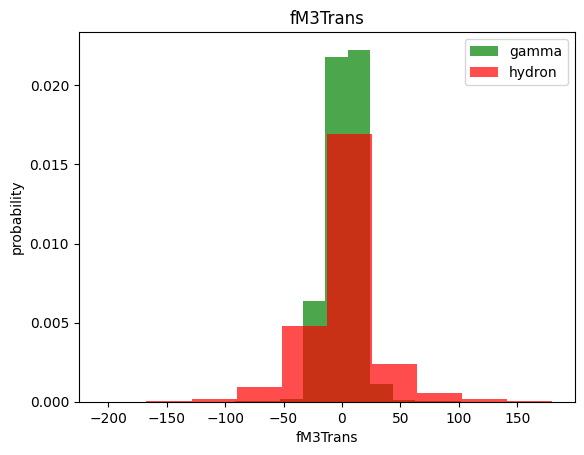

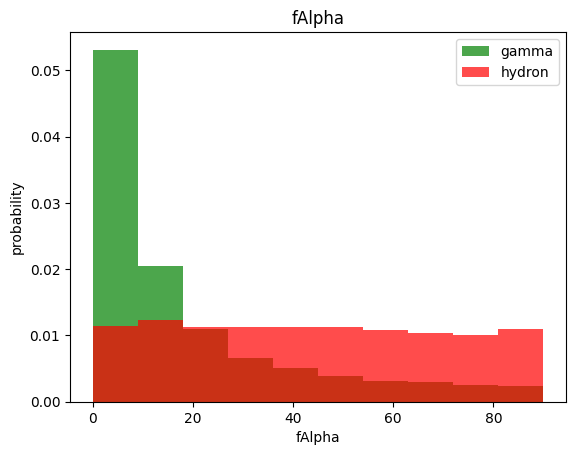

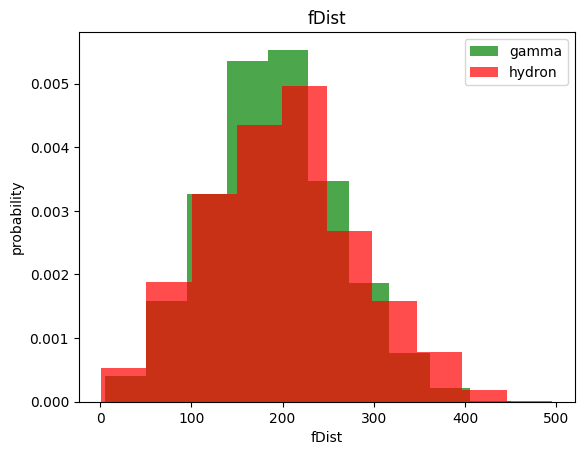

In [44]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color= "green", label ='gamma',alpha=0.7, density= True)
  plt.hist(df[df["class"]==0][label], color= "red", label ='hydron',alpha=0.7, density= True)
  plt.title(label)
  plt.ylabel("probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()


Train,Validation, and Test Datasets.

In [57]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [56]:
def scale_dataset(dataframe, oversample = False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scalar = StandardScaler()
  x = scalar.fit_transform(x)
  if oversample:
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x,y)

  data = np.hstack((x,np.reshape(y, [-1,1])))
  return data,x,y

In [58]:
print(len(train[train["class"]==1])) #gamma
print(len(train[train["class"]==0]))

7407
4005


As the number samples in training data set has inbalence between gammas and hydrons, We need to oversample class hydron data.

In [59]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

In [60]:
len(y_train)
print(sum(y_train ==1))
print(sum(y_train==0))

7407
7407


#K-Nearest Neighbors



In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

KNeighborsClassifier(n_neighbors=1):

In [69]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.71      1347
           1       0.83      0.89      0.85      2457

    accuracy                           0.80      3804
   macro avg       0.79      0.77      0.78      3804
weighted avg       0.80      0.80      0.80      3804



KNeighborsClassifier(n_neighbors=3):

In [70]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71      1347
           1       0.84      0.85      0.84      2457

    accuracy                           0.80      3804
   macro avg       0.78      0.78      0.78      3804
weighted avg       0.80      0.80      0.80      3804



#Naive Bayes Algorithm: